# 時系列データの分類
sin波のデータをcsvから読み込んで扱ってみよう

In [1]:
#tensorflow バージョン1に変更する必要あり
#2021.08.12から仕様が変更された

%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


## 問題

以下のプログラムを実行することで得られるcsvファイルのデータを分類する

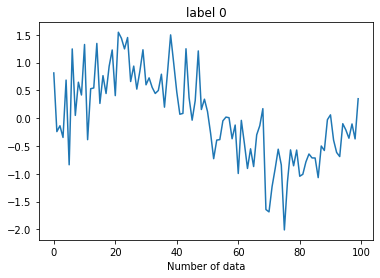

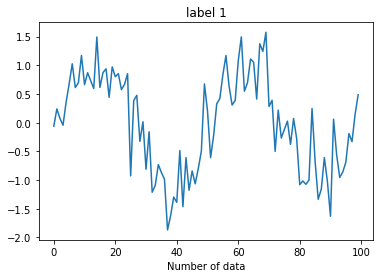

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def create_wavedata():
  np.random.seed(1)

  len_data = 100
  data_num = 100
  categories = 2

  x_data = []
  y_data = []
  for i in range(categories):
    for j in range(data_num):
      x = np.linspace(0,2*np.pi,len_data)
      y = np.sin(x*(i+1))+np.random.randn(x.shape[0])*0.5

      x_data.append(y)
      y_data.append(i)

  data = pd.DataFrame(x_data)
  data['label'] = y_data
  for i in range(categories):
    plt.plot(x_data[i*data_num])
    plt.title('label %d'%(i))
    plt.xlabel('Number of data')
    plt.show()
  data.to_csv('waveData.csv',encoding='UTF-8',index=False)
    
create_wavedata()

**必要なこと**


*   csvの読み込み
*   x_dataの作成
*   y_target(ordinal data)の作成
*   x_dataの正規化
*   y_data(one-hot data)の作成


### csvファイルの読み込み

In [3]:
#pd.read_csv('ファイル名')でデータを読み込む
wavedata = pd.read_csv('waveData.csv')
wavedata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,label
0,0.812173,-0.242454,-0.137493,-0.347233,0.683852,-0.838736,1.244068,0.049191,0.645716,0.415956,1.323962,-0.387283,0.528870,0.542565,1.343031,0.264630,0.763511,0.442524,0.930739,1.225555,0.404593,1.544173,1.435603,1.245086,1.449295,0.658010,0.935410,0.521937,0.844858,1.229020,0.599170,0.723978,0.552407,0.443423,0.496947,0.789430,0.197094,0.829902,1.496670,0.989181,...,-0.040335,-0.456229,-0.904796,-0.551503,-0.870356,-0.300211,-0.136085,0.170433,-1.643249,-1.685899,-1.231035,-0.909803,-0.558770,-0.842057,-2.009968,-1.146940,-0.570820,-0.856764,-0.573897,-1.045312,-1.010011,-0.788173,-0.644700,-0.715426,-0.716642,-1.069923,-0.501297,-0.581877,-0.028166,0.058818,-0.393619,-0.617437,-0.691028,-0.100286,-0.212478,-0.361178,-0.104794,-0.373424,0.349016,0
1,-0.223564,0.675678,0.328338,0.486041,-0.296308,0.396725,0.741941,-0.047055,0.353087,0.556948,-0.093651,0.800367,1.113159,0.304834,0.951419,0.158434,0.830378,0.073567,1.470341,1.138598,0.942594,0.584231,1.621686,1.977389,0.069876,1.617956,1.810680,1.158827,0.379168,1.395515,0.854541,0.620394,0.280965,1.141294,1.228973,0.483996,1.016038,0.140523,1.067700,0.641443,...,-1.165282,-0.588295,-0.904070,-0.548156,-0.919921,-0.372858,-0.789227,0.172996,-1.893181,-1.287301,-0.528059,0.274341,-1.121172,-0.978040,-1.112024,-0.328110,-1.128462,-0.631777,-1.114803,-1.570427,-0.752858,-0.629861,-0.203112,-0.869799,-1.084827,-0.453211,-0.569710,-0.502455,-0.629464,0.039528,-0.301450,0.522534,0.183866,0.017491,-1.064867,0.111908,0.083549,0.342052,0.522221,0
2,-0.200439,0.475427,-0.154560,1.166690,-0.414828,-0.568311,-0.453698,-0.015483,-0.073361,1.518680,0.429658,-0.028550,1.247270,0.441330,0.157720,1.252495,1.161407,0.663975,1.613402,0.998699,1.763377,1.223182,1.764211,1.048540,0.388995,2.224558,0.723968,0.890403,0.628603,0.862145,1.066336,1.023269,1.226504,1.762105,0.772338,0.179201,0.164591,0.379817,-0.170329,1.030674,...,-1.429609,-0.315181,-0.942969,-0.728738,-0.231542,-0.723651,-0.764760,-0.784105,-1.311637,-0.545840,-0.207123,-0.610419,-0.554400,-1.438515,-1.432761,-1.714276,-0.368681,-1.098902,-0.254980,-1.325104,-1.128386,-0.833741,-0.389000,-0.784201,-0.670584,-0.726328,-0.601485,-1.201023,-0.552444,-0.633930,-0.514609,-0.183627,-0.712002,-0.354287,-0.399829,0.019400,0.265793,-0.541137,0.292955,0
3,1.032892,-0.672155,-0.288493,-0.251038,0.111599,1.123458,0.378339,0.082448,0.797098,0.240739,1.154614,0.795421,1.384469,0.403920,2.291575,1.226868,1.177016,0.855859,0.546833,0.500264,0.886914,0.573177,1.126146,0.580790,1.309409,1.477935,0.643935,1.586164,0.859831,1.541486,1.164084,1.483518,0.397484,0.812628,1.558284,0.486743,-0.262851,-0.258600,-0.586451,-0.438923,...,-0.197185,-1.684356,-0.579502,-0.913980,-0.468663,-0.608489,-2.287261,-0.630031,-0.782864,-0.952911,-1.213139,-0.563181,-1.203369,-0.082515,-0.716676,0.075076,-1.377575,-1.849774,-0.597507,-0.507796,-0.891952,-1.650850,-1.073673,-0.505583,-0.868235,-0.792584,-0.777808,-1.109745,-0.859418,-1.253919,0.397783,-0.667481,-0.132857,-0.822976,0.146116,-1.125832,0.333715,-0.081108,1.055303,0
4,-0.653267,0.101614,0.310208,0.805701,0.039720,0.355266,-0.699571,0.014710,0.712005,1.092728,0.452040,1.670965,1.570204,0.704265,-0.430605,-0.074207,0.460796,1.439374,1.064768,-0.112976,0.840519,1.778492,0.797405,0.618854,2.026179,1.026579,0.757276,1.164905,0.987385,0.749271,1.549229,1.480205,1.316425,0.814582,1.406020,0.770911,0.989071,1.229538,1.071191,1.513036,...,-1.166854,-0.190197,-0.451492,-0.830426,-0.886766,-0.640948,-0.013326,-0.486869,-1.199229,-0.575133,-1.038188,-1.089321,-0.063619,-1.209343,-1.238460,-1.969891,-1.685972,-0.746250,-1.302363,-0.676441,-1.467068,-1.265108,-0.512440,-0.084130,-0.479910,-0.135676,0.162218,-0.122743,-1.052128,-0.593313,-0.171099,-0.637218,-0.145689,-1.101612,-0.665462,0.0751

### x_dataの作成

In [4]:
#データをx_dataに格納する
#:を間に挟むとその間のデータすべてが参照される
x_data = wavedata.loc[:,'0':'99']

#ndarray型に変換
x_data = np.array(x_data)
print(x_data.shape)

(200, 100)


In [5]:
#x_dataを作ったらあとのために実行
x_data_raw = np.copy(x_data)

### y_target(ordinal data)の作成

In [6]:
#データをy_targetに格納する
y_target = wavedata.loc[:,['label']]

#np.ndarray型に変換
y_target = np.array(y_target)
print(y_target.shape)
print('↓変換')

#→reshape関数で2次元行列から1次元配列に直す
y_target = y_target.reshape(-1)
print(y_target.shape)

(200, 1)
↓変換
(200,)


### x_dataのゼロ平均正規化

In [17]:
#波のデータごとに正規化を行う

#x_dataの横方向平均値を求めてxdata_meanとする
x_data_mean = x_data.mean(axis=1)
#ブロードキャスト機能を使用するために
#1次元配列から2次元配列(縦ベクトル)に変換
x_data_mean = x_data_mean.reshape(-1,1)

#x_dataの横方向標準偏差を求めてxdata_stdとする
x_data_std = x_data.std(axis=1)
#1次元配列から2次元配列(縦ベクトル)に変換
x_data_std = x_data_std.reshape(-1,1)

#(data-mean)/stdでゼロ平均正規化
x_data = (x_data - x_data_mean) / x_data_std

print('x_dataの平均(%dデータ分)'%(x_data.shape[0]))
print(x_data.mean(axis = 1)) #平均がほぼ0になっているか確認
print('\nx_dataの標準偏差(%dデータ分)'%(x_data.shape[0]))
print(x_data.std(axis = 1)) #標準偏差が1になっているか確認

x_dataの平均(200データ分)
[-1.16573418e-17  1.77635684e-17 -4.44089210e-18  1.44328993e-16
  2.58126853e-17 -5.21804822e-17 -6.05071548e-17 -1.92901251e-16
  3.33066907e-18 -9.65894031e-17 -1.99840144e-17  1.11022302e-17
 -2.44249065e-17  2.77555756e-19 -2.88657986e-17 -7.07767178e-18
 -1.19904087e-16  1.77635684e-17 -2.77555756e-19  2.55351296e-17
 -1.47520884e-16 -5.32907052e-17 -2.23154828e-16  1.88737914e-17
  1.56541446e-16  3.60822483e-17 -8.88178420e-17 -9.00321484e-17
 -1.21014310e-16 -1.08801856e-16  1.48214774e-16 -7.77156117e-18
 -6.38378239e-17  6.88338275e-17  6.49480469e-17 -4.21884749e-17
 -3.38271078e-17  1.11022302e-17  1.09634524e-16  2.60902411e-17
 -1.23789867e-16  7.54951657e-17  1.11022302e-18  6.60582700e-17
  1.44745327e-16 -5.10702591e-17  8.88178420e-18 -6.80705492e-17
  1.35655376e-16 -1.77635684e-17  1.53210777e-16 -1.49880108e-16
  5.88418203e-17 -6.16173779e-17  1.83741911e-16 -1.72084569e-17
  8.88178420e-17  2.10942375e-17  1.88737914e-17 -9.76996262e-17
 -2.22

### y_data(one-hot data)の作成

In [8]:
#y_targetのone-hot表現をy_dataに格納
y_data = np.eye(len(np.unique(y_target)))[y_target]
print(y_data.shape)

(200, 2)


### データの分割

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,stratify=y_data)

print('x_trainの形')
print(x_train.shape)
print('\ny_trainの形')
print(y_train.shape)
print('\nx_testの形')
print(x_test.shape)
print('\ny_testの形')
print(y_test.shape)

x_trainの形
(150, 100)

y_trainの形
(150, 2)

x_testの形
(50, 100)

y_testの形
(50, 2)


## 分類器の作成

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

wave_model = Sequential([
                           LSTM(1,input_shape=(x_data.shape[1],1)),
                           Dense(len(np.unique(y_target)),activation='softmax')
],name='wave_model')
wave_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


Model: "wave_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras.optimizers import Adam
wave_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

## 学習

In [12]:
xtrain_lstm = x_train.reshape(-1,x_data.shape[1],1)
xtest_lstm = x_test.reshape(-1,x_data.shape[1],1)
wave_his = wave_model.fit(xtrain_lstm,y_train,epochs=200,validation_split=0.2)


Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 1s 4ms/step - loss: 0.6897 - accuracy: 0.5750 - val_loss: 0.6904 - val_accuracy: 0.5667
Epoch 2/200
120/120 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.6250 - val_loss: 0.6904 - val_accuracy: 0.5667
Epoch 3/200
120/120 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.6500 - val_loss: 0.6902 - val_accuracy: 0.5333
Epoch 4/200
120/120 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.6583 - val_loss: 0.6901 - val_accuracy: 0.5333
Epoch 5/200
120/120 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.6667 - val_loss: 0.6899 - val_accuracy: 0.5667
Epoch 6/200
120/120 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.6583 - val_loss: 0.6898 - val_accuracy: 0.6000
Epoch 7/200
120/120 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.

## 学習結果

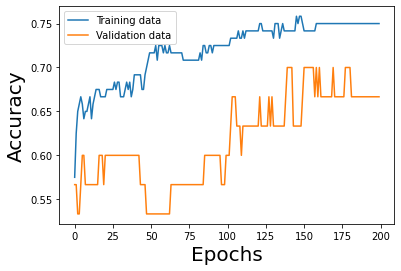

In [13]:
plt.plot(wave_his.history['accuracy'],label='Training data')
plt.plot(wave_his.history['val_accuracy'],label='Validation data')
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.legend()
plt.show()

In [14]:
wave_loss,wave_acc = wave_model.evaluate(xtest_lstm,y_test)
print('test_data accuracy : %.3f'%(wave_acc))

50/50 [==============================] - 0s 373us/step
test_data accuracy : 0.740


実際に予測してみる

In [15]:
wave_pred = wave_model.predict(x_data.reshape(-1,x_data.shape[1],1))
print('予測完了')

予測完了


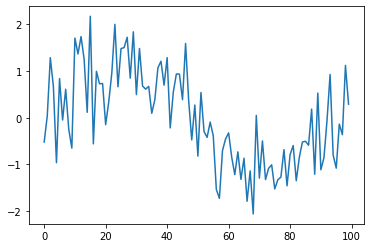

Predict : 0
Correct : 0



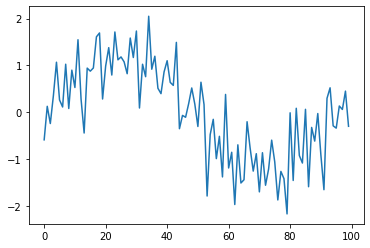

Predict : 0
Correct : 0



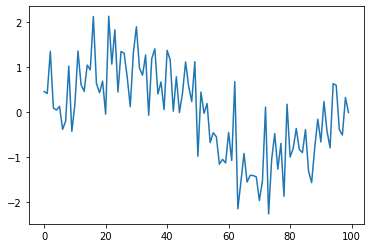

Predict : 0
Correct : 0



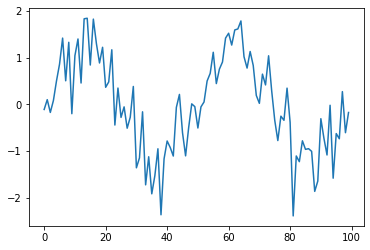

Predict : 1
Correct : 1



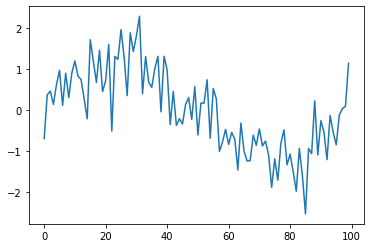

Predict : 0
Correct : 0



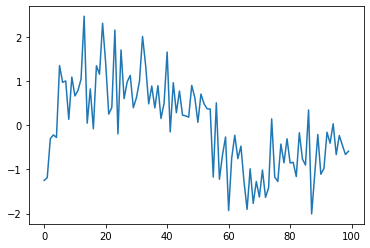

Predict : 1
Correct : 0



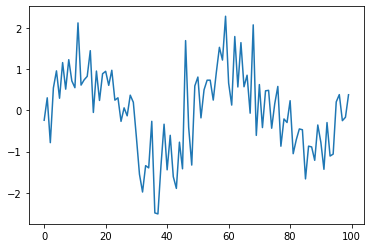

Predict : 0
Correct : 1



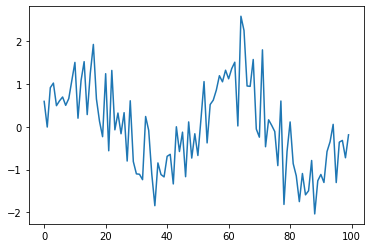

Predict : 1
Correct : 1



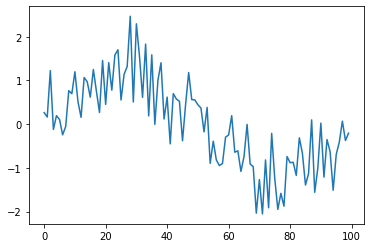

Predict : 1
Correct : 0



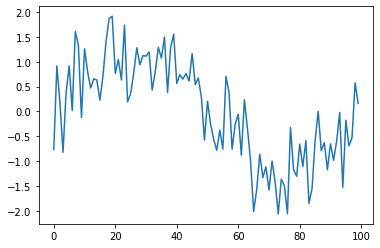

Predict : 0
Correct : 0



In [16]:
wave_pred_vec = np.argmax(wave_pred,axis=1)
for i in np.random.randint(0,x_data.shape[0],10):
  plt.plot(x_data[i])
  plt.show()
  print('Predict : %d'%(wave_pred_vec[i]))
  print('Correct : %d\n'%(y_target[i]))